In [106]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [107]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.stats.sandwich_covariance as sw

In [108]:
df = pd.read_excel (r'C:\Users\Aida\Data - 2.xlsx', sheet_name='Sheet1')  # import excel file to Python
print (df.shape)
df

(25, 7)


,Company name,Companycode,Year,ROA,CR,LR,SIZE
0,Allianz SE,ALV,2017,0.800,0.033,0.304,5.955
1,Allianz SE,ALV,2018,0.858,0.031,0.282,5.953
2,Allianz SE,ALV,2019,0.821,0.031,0.282,6.005
3,Allianz SE,ALV,2020,0.673,0.037,0.276,6.025
4,Allianz SE,ALV,2021,0.624,0.034,0.329,6.057
5,Münchener Rück AG,MUV2,2017,0.148,0.028,0.149,5.424
6,Münchener Rück AG,MUV2,2018,0.842,0.022,0.168,5.432
7,Münchener Rück AG,MUV2,2019,0.941,0.021,0.175,5.459
8,Münchener Rück AG,MUV2,2020,0.406,0.020,0.175,5.474
9,Münchener Rück AG,MUV2,2021,0.938,0.021,0.186,5.495


In [109]:
# Descriptive statistic

In [110]:
X = df[['CR', 'LR', 'SIZE']]
y = df['ROA']
df[['ROA', 'CR','LR','SIZE']].describe().round(3).T 

,count,mean,std,min,25%,50%,75%,max
ROA,25.0,0.567,1.160,-2.966,0.624,0.838,0.941,1.924
CR,25.0,0.055,0.039,0.019,0.024,0.033,0.084,0.150
LR,25.0,0.387,0.237,0.096,0.276,0.354,0.469,1.221
SIZE,25.0,5.360,0.393,4.787,5.191,5.296,5.474,6.057


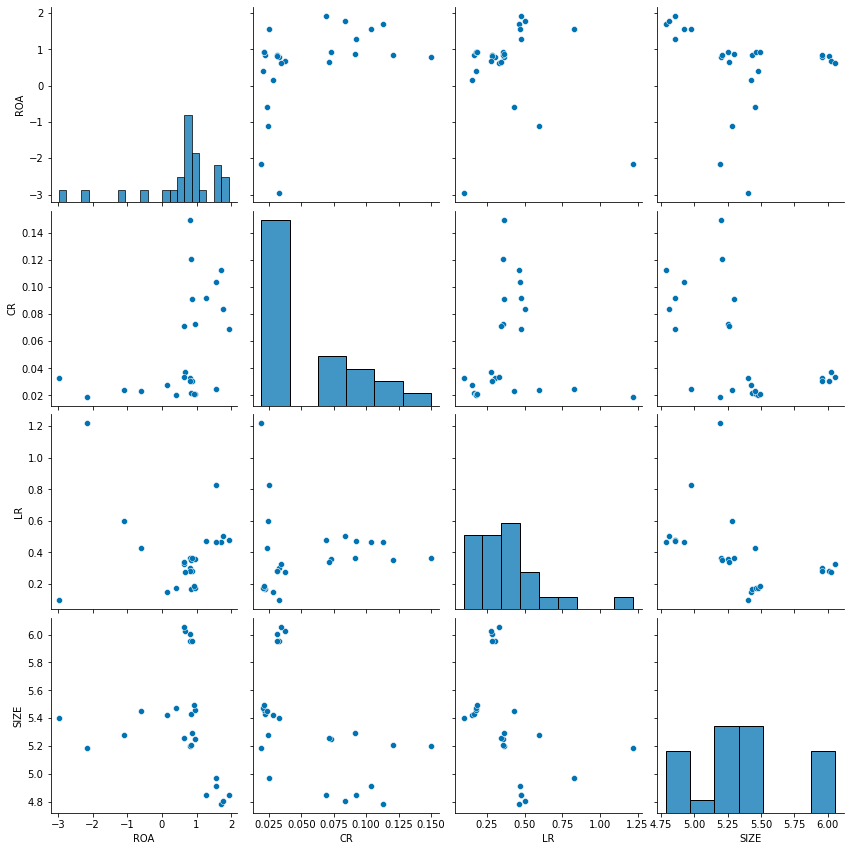

In [111]:
# Visualize the data using scatter plot and histogram #  import seaborn as sns and use pairplot() function
sns.set_palette('colorblind') #build color palettes 
#sns.pairplot(data=df, height=3)
sns.pairplot(df[['ROA', 'CR','LR','SIZE']], height=3) 

In [112]:
# Build models: use the LinearRegression() function from the sklearn library 

In [113]:
# Set independent and dependent variables
X = df[['CR', 'LR', 'SIZE']]
y = df['ROA']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 1.8156697601004779
Coefficients: [11.32392273 -0.95958496 -0.27947775]


In [114]:
# OLS Model Validation ---- 3 different formula to define model and we got the same result.

In [115]:
#Define the y and X variables:

#y_var_name = 'ROA'
#X_var_names = ['CR', 'LR', 'SIZE']
#Carve out the y vector from the data panel:

endog=df['ROA']
#Carve out the X matrix from the data panel:

pooled_X=df[['CR', 'LR', 'SIZE']]
#Add the placeholder for the regression intercept. When the model is fitted, the coefficient of this variable is the regression model’s intercept β_0.

exog = sm.add_constant(pooled_X)
#Build the OLS regression model:

olsmod = sm.OLS(endog, exog).fit()
#Train the model on the (y, X) data set and fetch the training results:

#olsmod_results = olsmod
#Print the training summary:

print(olsmod.summary())
#We get the following output:

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1.810
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.176
Time:                        13:23:43   Log-Likelihood:                -35.791
No. Observations:                  25   AIC:                             79.58
Df Residuals:                      21   BIC:                             84.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8157      4.605      0.394      0.6

In [116]:
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('ROA ~ CR+LR+SIZE', data=df).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1.810
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.176
Time:                        13:23:43   Log-Likelihood:                -35.791
No. Observations:                  25   AIC:                             79.58
Df Residuals:                      21   BIC:                             84.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8157      4.605      0.394      0.6

mod = smf.ols(formula='ROA ~ 1 + CR + LR + C(SIZE)', data=df)
res = mod.fit()
print(res.summary())

In [117]:
X = df[['CR', 'LR', 'SIZE']]
y = df['ROA']
exog = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(y, exog).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1.810
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.176
Time:                        13:23:43   Log-Likelihood:                -35.791
No. Observations:                  25   AIC:                             79.58
Df Residuals:                      21   BIC:                             84.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8157      4.605      0.394      0.6

In [118]:
# Coefficient of Determination ( R2 )

In [119]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.2054553069004249


In [120]:
# F-test (ANOVA)
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 1.8100770929480439
Probability of observing value at least as high as F-statistic: 0.17622330213048243


In [121]:
# T-test
print(olsmod.pvalues)

const    0.697349
CR       0.127563
LR       0.385749
SIZE     0.721805
dtype: float64


In [122]:
df['ROA_pred'] = olsmod.predict(exog)
df['residual'] = olsmod.resid
print (df)

                     Company name Companycode  Year    ROA     CR     LR  \
0                      Allianz SE         ALV  2017  0.800  0.033  0.304   
1                      Allianz SE         ALV  2018  0.858  0.031  0.282   
2                      Allianz SE         ALV  2019  0.821  0.031  0.282   
3                      Allianz SE         ALV  2020  0.673  0.037  0.276   
4                      Allianz SE         ALV  2021  0.624  0.034  0.329   
5               Münchener Rück AG        MUV2  2017  0.148  0.028  0.149   
6               Münchener Rück AG        MUV2  2018  0.842  0.022  0.168   
7               Münchener Rück AG        MUV2  2019  0.941  0.021  0.175   
8               Münchener Rück AG        MUV2  2020  0.406  0.020  0.175   
9               Münchener Rück AG        MUV2  2021  0.938  0.021  0.186   
10               Hannover Rück SE        HNR1  2017  1.708  0.113  0.465   
11               Hannover Rück SE        HNR1  2018  1.776  0.084  0.502   
12          

In [123]:
# Assumption Testing
# Linearity
# Normality
# Multicollinearity
# Autocorrelation
# Homoscedasticity

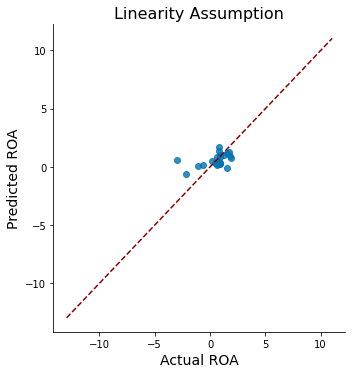

In [124]:
# Linearity
# Plotting the observed vs predicted values
sns.lmplot(x='ROA', y='ROA_pred', data=df, fit_reg=False, height=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['ROA', 'ROA_pred']].min().min()-10, 
                        df[['ROA', 'ROA_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkred', linestyle='--')

plt.ylabel('Predicted ROA', fontsize=14)
plt.xlabel('Actual ROA', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [125]:
# Normality

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.003925536324679356


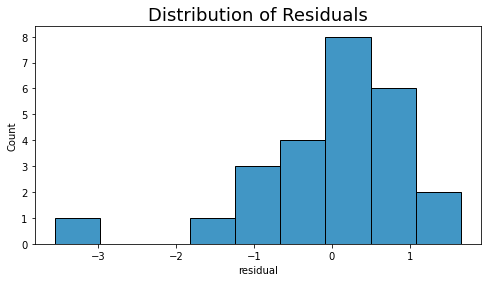

Residuals are not normally distributed


In [126]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.histplot(df['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [127]:
# Multicollinearity

Pearson correlation coefficient matrix of each variables:
            ROA        CR        LR      SIZE
ROA   1.000000  0.419040 -0.137411 -0.215156
CR    0.419040  1.000000  0.048458 -0.539808
LR   -0.137411  0.048458  1.000000 -0.425053
SIZE -0.215156 -0.539808 -0.425053  1.000000


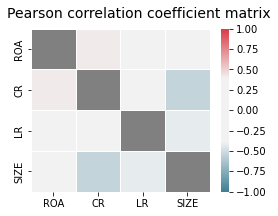

In [128]:
corr = df[['ROA', 'CR', 'LR', 'SIZE']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

In [129]:
# variance inflation factor (VIF)

In [130]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('ROA ~ CR+LR+SIZE', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
#view VIF for each explanatory variable
vif

,VIF,variable
0,434.165058,Intercept
1,1.495603,CR
2,1.293489,LR
3,1.821111,SIZE


In [131]:
# Autocorrelation

In [132]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.2804129622486586
Signs of positive autocorrelation 

Assumption not satisfied


In [133]:
# Homoscedasticity

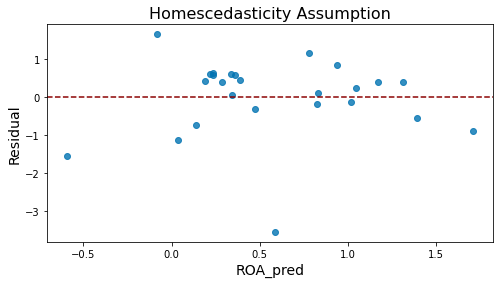

In [134]:
# Plotting the residuals

plt.subplots(figsize=(8, 4))
plt.scatter(x=df.ROA_pred, y=df.residual, alpha=0.8)
plt.axhline(0, color='darkred', linestyle='--')
plt.ylabel('Residual', fontsize=14)
plt.xlabel('ROA_pred', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show() 

In [135]:
# White-Test
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']

#run the White test
results = het_white(olsmod.resid, exog)
 
#print the results. We will get to see the values of two test-statistics and the corresponding p-values
lzip(keys, results)

[('Lagrange Multiplier statistic:', 10.94532822523011),
 ("LM test's p-value:", 0.2794750441566051),
 ('F-statistic:', 1.2979466188220905),
 ("F-test's p-value:", 0.3147487219700452)]

In [136]:
# Bresuch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(olsmod.resid, exog)
lzip(names, test)

[('Lagrange multiplier statistic', 1.9416553400180754),
 ('p-value', 0.5846042239420133),
 ('f-value', 0.5894433265070804),
 ('f p-value', 0.6286999697356085)]

In [147]:
df = pd.read_excel (r'C:\Users\Aida\Data - 2.xlsx', sheet_name='Sheet1')  # import excel file to Python
print (df.shape)
df

(25, 7)


,Company name,Companycode,Year,ROA,CR,LR,SIZE
0,Allianz SE,ALV,2017,0.800,0.033,0.304,5.955
1,Allianz SE,ALV,2018,0.858,0.031,0.282,5.953
2,Allianz SE,ALV,2019,0.821,0.031,0.282,6.005
3,Allianz SE,ALV,2020,0.673,0.037,0.276,6.025
4,Allianz SE,ALV,2021,0.624,0.034,0.329,6.057
5,Münchener Rück AG,MUV2,2017,0.148,0.028,0.149,5.424
6,Münchener Rück AG,MUV2,2018,0.842,0.022,0.168,5.432
7,Münchener Rück AG,MUV2,2019,0.941,0.021,0.175,5.459
8,Münchener Rück AG,MUV2,2020,0.406,0.020,0.175,5.474
9,Münchener Rück AG,MUV2,2021,0.938,0.021,0.186,5.495


In [149]:
cc = pd.Categorical(df.Companycode)
df = df.set_index(["Companycode", "Year"])
df["Companycode"] = cc
print(df)

                                   Company name    ROA     CR     LR   SIZE  \
Companycode Year                                                              
ALV         2017                     Allianz SE  0.800  0.033  0.304  5.955   
            2018                     Allianz SE  0.858  0.031  0.282  5.953   
            2019                     Allianz SE  0.821  0.031  0.282  6.005   
            2020                     Allianz SE  0.673  0.037  0.276  6.025   
            2021                     Allianz SE  0.624  0.034  0.329  6.057   
MUV2        2017              Münchener Rück AG  0.148  0.028  0.149  5.424   
            2018              Münchener Rück AG  0.842  0.022  0.168  5.432   
            2019              Münchener Rück AG  0.941  0.021  0.175  5.459   
            2020              Münchener Rück AG  0.406  0.020  0.175  5.474   
            2021              Münchener Rück AG  0.938  0.021  0.186  5.495   
HNR1        2017               Hannover Rück SE  1.7

In [150]:
# FE and RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
endog = df['ROA']
#Carve out the X matrix from the data panel:
pooled_X = df[['CR', 'LR', 'SIZE']]
#Add the placeholder for the regression intercept. When the model is fitted, the coefficient of this variable is the regression model’s intercept β_0.
exog = sm.add_constant(pooled_X)
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    ROA   R-squared:                        0.1463
Estimator:              RandomEffects   R-squared (Between):             -0.5479
No. Observations:                  25   R-squared (Within):               0.2383
Date:                Thu, Oct 13 2022   R-squared (Overall):             -0.2362
Time:                        13:38:43   Log-likelihood                   -26.678
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.1999
Entities:                           5   P-value                           0.3341
Avg Obs:                       5.0000   Distribution:                    F(3,21)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             1.1999
                            

In [151]:
# fixed effects model
pooled_X = df[['CR', 'LR', 'SIZE']]
exog = sm.add_constant(pooled_X)
model_fe = PanelOLS(endog, exog, entity_effects=True, time_effects=True) 
fe_res = model_fe.fit(cov_type='clustered', cluster_entity=True) 
#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROA   R-squared:                        0.6097
Estimator:                   PanelOLS   R-squared (Between):             -16.788
No. Observations:                  25   R-squared (Within):               0.1628
Date:                Thu, Oct 13 2022   R-squared (Overall):             -10.068
Time:                        13:38:45   Log-likelihood                   -12.291
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.7701
Entities:                           5   P-value                           0.0055
Avg Obs:                       5.0000   Distribution:                    F(3,13)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             103.83
                            

In [152]:
# Perform Hausman-Test
import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe_res, re_res):
    b = fe_res.params
    B = re_res.params
    v_b = fe_res.cov
    v_B = re_res.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 87.0705170598103
degrees of freedom: 4
p-Value: 5.51545607209839e-18


In [153]:
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 87.0705170598103
degrees of freedom: 4
p-Value: 5.51545607209839e-18
